In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# Importação dos dados
* uid: 000001
* tipo de dia: dia letivo
* horario: 13:30 a 17:30
* potencia: ativa da fase A
* época: primavera
* dias: terça e quinta 


In [3]:
data = pd.read_csv ('../datasets/temperatura_e_potencia.csv', sep=',', decimal=',')
data.describe()

,temperatura,potencia ativa A
count,26.000000,26.000000
mean,22.509615,126.516288
std,2.436679,44.536723
min,18.250000,75.269469
25%,20.750000,95.887782
50%,22.500000,113.824270
75%,24.437500,146.406799
max,27.500000,223.926640


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f40ad6535c0>,
      dtype=object)

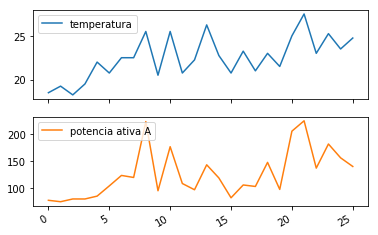

In [13]:
data.plot(subplots=True)

In [7]:
data.corr()

,temperatura,potencia ativa A
temperatura,1.00000,0.88012
potencia ativa A,0.88012,1.00000


# Training

In [4]:
from sklearn.model_selection import train_test_split 
X = data ['temperatura'].to_frame()
y = data ['potencia ativa A'].to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 




In [5]:
lm = LinearRegression()
lm.fit (X, y)
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
temperatura,16.086504


# Model Evaluation

MAE: 15.363788513254276
MSE: 482.9751182559476
RMSE: 21.976694889267304


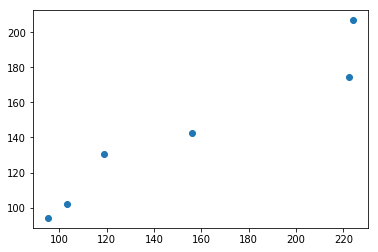

In [7]:
from sklearn import metrics
predictions = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.scatter(y_test,predictions)